# 보스턴집값 딥러닝

In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
from sklearn import datasets

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [4]:
housing = datasets.load_boston()
type(housing)

sklearn.utils.Bunch

sklearn.utils.Bunch : dictionary 객체로 만들어 놓은 것

## 문제

In [5]:
X_data = housing.data
X_data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

## 답(집값)

In [6]:
y_data = housing.target
y_data

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
X_data.shape

(506, 13)

In [8]:
housing.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## 스케일링

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)
X_data_scaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, 
                                                    test_size=0.1, 
                                                    shuffle=True, 
                                                    random_state=11)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 13) (455,)
(51, 13) (51,)


## Layer를 순서대로 쌓아줄 객체 필요 Sequantial
## 각 Layer는 Dense객체
## 심층 신경망

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

### 레이어를 순서대로 쌓을 수 있도록 객체를 생성

In [15]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=13))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear')) 
## 회귀일떄, 마지막 출력층의 활성화 함수

## 쌓은 것으로 모델 셋팅 하기
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

## 모델에 셋팅한 내용을 요약해서 프린트
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


## 모델 훈련

In [51]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
15/15 - 0s - loss: 8.3288 - mae: 2.0470 - 13ms/epoch - 858us/step
Epoch 2/100
15/15 - 0s - loss: 8.7359 - mae: 2.1027 - 10ms/epoch - 666us/step
Epoch 3/100
15/15 - 0s - loss: 8.5170 - mae: 2.0899 - 10ms/epoch - 665us/step
Epoch 4/100
15/15 - 0s - loss: 7.9735 - mae: 2.0250 - 9ms/epoch - 598us/step
Epoch 5/100
15/15 - 0s - loss: 8.2934 - mae: 2.0654 - 10ms/epoch - 665us/step
Epoch 6/100
15/15 - 0s - loss: 8.5980 - mae: 2.1195 - 11ms/epoch - 731us/step
Epoch 7/100
15/15 - 0s - loss: 8.1512 - mae: 2.0237 - 10ms/epoch - 665us/step
Epoch 8/100
15/15 - 0s - loss: 8.1893 - mae: 2.0572 - 11ms/epoch - 731us/step
Epoch 9/100
15/15 - 0s - loss: 8.0562 - mae: 2.0216 - 11ms/epoch - 731us/step
Epoch 10/100
15/15 - 0s - loss: 7.7877 - mae: 2.0192 - 10ms/epoch - 665us/step
Epoch 11/100
15/15 - 0s - loss: 7.9678 - mae: 2.0479 - 10ms/epoch - 665us/step
Epoch 12/100
15/15 - 0s - loss: 7.4026 - mae: 1.9673 - 11ms/epoch - 731us/step
Epoch 13/100
15/15 - 0s - loss: 7.4960 - mae: 1.9813 - 11ms/ep

In [52]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 996us/step - loss: 7.0976 - mae: 1.9513


[7.097605228424072, 1.9512734413146973]

In [53]:
pred_test = model.predict(X_test)
pred_test[:5]

array([[22.406855],
       [12.621603],
       [26.056044],
       [22.891521],
       [ 9.612611]], dtype=float32)

In [54]:
y_test[:5]

array([23.4,  8.1, 22. , 15. , 10.4])

In [55]:
pred_test[46:]

array([[20.202044],
       [22.497646],
       [16.226383],
       [18.161823],
       [22.141695]], dtype=float32)

In [56]:
y_test[46:]

array([20.1, 22. , 16.7, 18.7, 19.6])

In [57]:
from sklearn.metrics import r2_score

In [58]:
R2 = r2_score(y_test, pred_test)
R2

0.9084661371383668

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

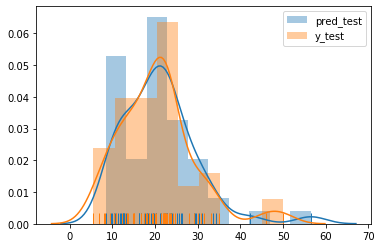

In [70]:
sns.distplot(pred_test, hist=True, rug=True, label="pred_test")
sns.distplot(y_test, hist=True, rug=True, label="y_test")
plt.legend()
plt.show()

No handles with labels found to put in legend.


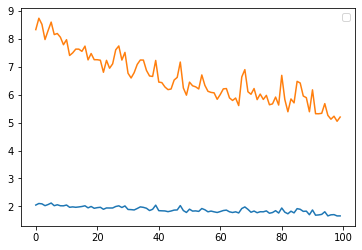

In [69]:
plt.plot(history.history['mae'])
plt.plot(history.history['loss'])
plt.legend()
plt.show()